In [6]:
# Código baseado em: https://www.youtube.com/watch?v=cO59qwb3Haw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = '/content/gdrive/My Drive/Disciplinas/Pos-IA/Inteligencia_Artificial/Aulas/Aula08-MLP/'
dataset = pd.read_csv(PATH+'auto-mpg.csv')
dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'Relação entre peso e autonomia')

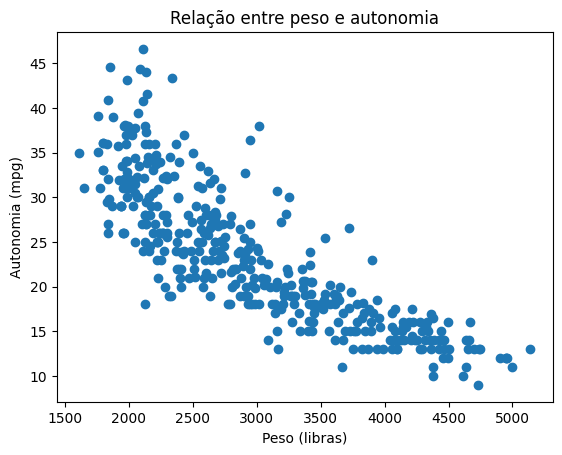

In [8]:
plt.scatter(dataset[["weight"]], dataset[["mpg"]])
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("Relação entre peso e autonomia")


In [9]:
X = dataset[["weight"]]
# X = dataset[["weight", "cylinders", "displacement"]]
Y = dataset[["mpg"]]

# Conversão de Medidas
X["weight"] *= 0.453592
Y["mpg"] *= 0.425144
X
# X.describe()


/tmp/ipython-input-9-2880680534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["weight"] *= 0.453592
/tmp/ipython-input-9-2880680534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["mpg"] *= 0.425144


,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [10]:
# Normalização dos Dados
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)
X_norm

array([[ 0.63086987],
       [ 0.85433297],
       [ 0.55047045],
       [ 0.54692342],
       [ 0.56584093],
       [ 1.62049216],
       [ 1.63586264],
       [ 1.58620417],
       [ 1.71980909],
       [ 1.03996105],
       [ 0.7006282 ],
       [ 0.75501604],
       [ 0.93473239],
       [ 0.1366499 ],
       [-0.70754402],
       [-0.16248324],
       [-0.23224156],
       [-0.45333997],
       [-0.99367137],
       [-1.34246298],
       [-0.35284069],
       [-0.63896804],
       [-0.70399699],
       [-0.87070755],
       [-0.38121696],
       [ 1.94445453],
       [ 1.66187422],
       [ 1.66896828],
       [ 2.08278883],
       [-0.99367137],
       [-0.83523722],
       [-0.87780162],
       [-1.0929883 ],
       [-0.39776978],
       [ 0.55401749],
       [ 0.4239596 ],
       [ 0.3920363 ],
       [ 0.37548348],
       [ 1.4644227 ],
       [ 1.76592053],
       [ 1.39939375],
       [ 1.33081778],
       [ 2.34645164],
       [ 2.09934165],
       [ 2.56518536],
       [-0

In [11]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

In [37]:
rna = MLPRegressor(hidden_layer_sizes=(8,4,2),
                   max_iter=20000,
                   tol=0.00001,
                   learning_rate_init=0.01,
                   solver="adam",
                   activation="relu",
                   learning_rate="constant",
                   verbose=2)


In [38]:
rna.fit(X_norm_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 64.18525476
Iteration 2, loss = 62.60825107
Iteration 3, loss = 60.97628215
Iteration 4, loss = 59.32716199
Iteration 5, loss = 57.62670051
Iteration 6, loss = 55.91289629
Iteration 7, loss = 54.16570513
Iteration 8, loss = 52.33385664
Iteration 9, loss = 50.43828864
Iteration 10, loss = 48.41626471
Iteration 11, loss = 46.26064225
Iteration 12, loss = 43.96250573
Iteration 13, loss = 41.54778681
Iteration 14, loss = 39.09372613
Iteration 15, loss = 36.66710710
Iteration 16, loss = 34.25773400
Iteration 17, loss = 31.93624310
Iteration 18, loss = 29.59927179
Iteration 19, loss = 27.45337735
Iteration 20, loss = 25.32446927
Iteration 21, loss = 23.26901200
Iteration 22, loss = 21.27574556
Iteration 23, loss = 19.26179136
Iteration 24, loss = 17.27009626
Iteration 25, loss = 15.28706224
Iteration 26, loss = 13.38942061
Iteration 27, loss = 11.58158376
Iteration 28, loss = 9.84135045
Iteration 29, loss = 8.26622865
Iteration 30, loss = 6.87586094
Iteration 31, loss = 5

MLPRegressor(hidden_layer_sizes=(8, 4, 2), learning_rate_init=0.01,
             max_iter=20000, tol=1e-05, verbose=2)

In [39]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.0000001,
                         eta0=0.1,
                         learning_rate="constant",
                         verbose=2)

In [40]:
reglinear.fit(X_norm_train,Y_train)

-- Epoch 1
Norm: 2.32, NNZs: 1, Bias: 10.091873, T: 278, Avg. loss: 2.742566
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.80, NNZs: 1, Bias: 10.140670, T: 556, Avg. loss: 1.827436
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.52, NNZs: 1, Bias: 9.830227, T: 834, Avg. loss: 1.825635
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.92, NNZs: 1, Bias: 10.724520, T: 1112, Avg. loss: 1.784701
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 1, Bias: 9.255941, T: 1390, Avg. loss: 1.726972
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 1, Bias: 10.532630, T: 1668, Avg. loss: 1.884589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.63, NNZs: 1, Bias: 9.701396, T: 1946, Avg. loss: 1.826719
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.48, NNZs: 1, Bias: 11.182665, T: 2224, Avg. loss: 1.787733
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.02, NNZs: 1, Bias: 10.131818, T: 2502, Avg. loss: 1.780296
Total training time: 0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

In [41]:
# Realizar a inferência
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [42]:
# Calcular o Score (r2)
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test, Y_rl_previsao)
print("R2 RNA: ",r2_rna)
print("R2 Linear: ",r2_rl)

R2 RNA:  0.6970775798924678
R2 Linear:  0.5801703728452978


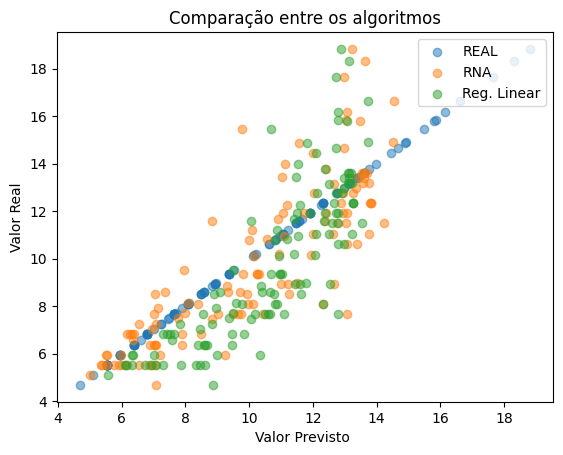

In [43]:
plt.scatter(Y_test, Y_test, alpha=0.5, label="REAL")
plt.scatter(Y_rna_previsao, Y_test, alpha=0.5, label="RNA")
plt.scatter(Y_rl_previsao, Y_test, alpha=0.5, label="Reg. Linear")
plt.xlabel("Valor Previsto ")
plt.ylabel("Valor Real")
plt.title("Comparação entre os algoritmos")
plt.legend(loc=1)

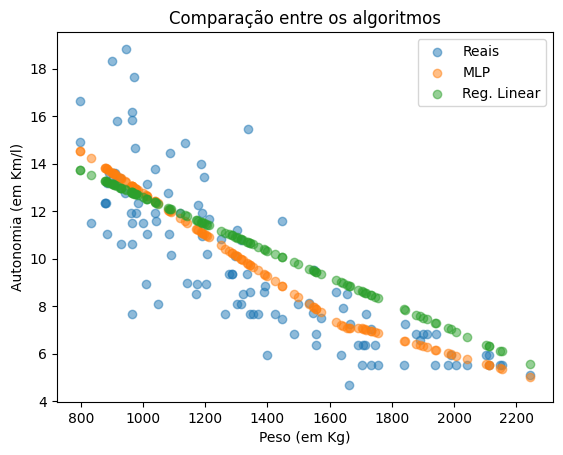

In [44]:
X_test = escala.inverse_transform(X_norm_test)
plt.scatter(X_test, Y_test, alpha=0.5, label="Reais")
plt.scatter(X_test, Y_rna_previsao, alpha=0.5, label="MLP")
plt.scatter(X_test, Y_rl_previsao, alpha=0.5, label="Reg. Linear")
plt.xlabel("Peso (em Kg)")
plt.ylabel("Autonomia (em Km/l)")
plt.title("Comparação entre os algoritmos")
plt.legend(loc=1)

In [ ]:
# Alterar os hiperparâmetros e verificar o resultado
# Otimização de hiperparâmetros

In [45]:
# Prever um novo registro
X_futuro = np.array([[1250]])
X_futuro_norm = escala.transform(X_futuro.T)

y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)
print("RNA: ",y_rna_prev_futuro)
print("Reg Linear: ",y_reglinear_prev_futuro)

RNA:  [10.55579115]
Reg Linear:  [11.17725543]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


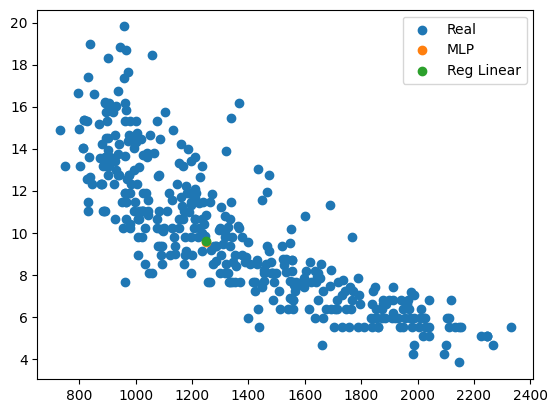

In [ ]:
plt.scatter(X, Y, label="Real")
plt.scatter(X_futuro, y_rna_prev_futuro, label="MLP")
plt.scatter(X_futuro, y_reglinear_prev_futuro, label="Reg Linear")
plt.legend(loc=1)

In [ ]:
# Adicionar novas features para verificar a contribuição delas
# Encontrar melhor configuração de parâmetros da rede